Cookie Cats is a hugely popular mobile puzzle game developed by Tactile Entertainment. It's a classic "connect three" style puzzle game where the player must connect tiles of the same color in order to clear the board and win the level. It also features singing cats.
As players progress through the game they will encounter gates that force them to wait some time before they can progress or make an in-app purchase. In this project, we will analyze the result of an experiment where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention and game rounds.
https://www.youtube.com/watch?v=0G-612U2vQY

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
from scipy import stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/stevani10/GenerasiGigih2.0/main/cookie_cats.csv')

In [ ]:
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


##Grouping

In [ ]:
data.groupby('version')['version'].count()

version
gate_30    44700
gate_40    45489
Name: version, dtype: int64

In [ ]:
data.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

In [ ]:
data.groupby('version')['retention_7'].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

In [ ]:
newdata = data.groupby('sum_gamerounds').count().reset_index()
newdata.head()

,sum_gamerounds,userid,version,retention_1,retention_7
0,0,3994,3994,3994,3994
1,1,5538,5538,5538,5538
2,2,4606,4606,4606,4606
3,3,3958,3958,3958,3958
4,4,3629,3629,3629,3629


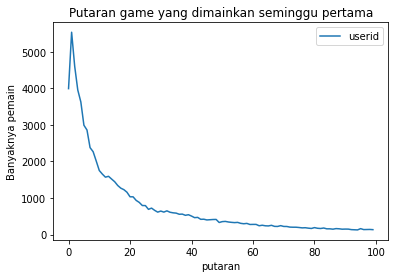

In [ ]:
newdata = data.groupby('sum_gamerounds').count().reset_index()

ax = newdata.head(n=100).plot('sum_gamerounds', 'userid')
ax.set_xlabel("putaran")
ax.set_ylabel("Banyaknya pemain")
ax.set_title("Putaran game yang dimainkan seminggu pertama");

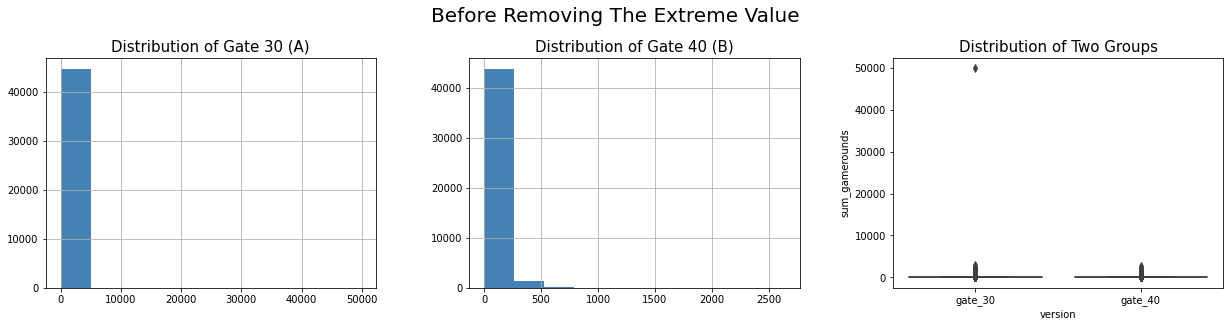

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (18,5))
data[(data.version == "gate_30")].hist("sum_gamerounds", ax = axes[0], color = "steelblue")
data[(data.version == "gate_40")].hist("sum_gamerounds", ax = axes[1], color = "steelblue")
sns.boxplot(x = data.version, y = data.sum_gamerounds, ax = axes[2])

plt.suptitle("Before Removing The Extreme Value", fontsize = 20)
axes[0].set_title("Distribution of Gate 30 (A)", fontsize = 15)
axes[1].set_title("Distribution of Gate 40 (B)", fontsize = 15)
axes[2].set_title("Distribution of Two Groups", fontsize = 15)

plt.tight_layout(pad = 4);

In [ ]:
gate_30 = data.query("version == 'gate_30'")['sum_gamerounds'].values
gate_40 = data.query("version == 'gate_40'")['sum_gamerounds'].values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


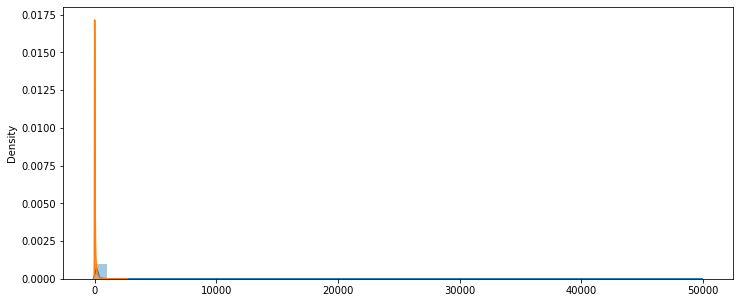

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(gate_30)
sns.distplot(gate_40)



The uninterested: the players who did not come back on day-1 and also did not comback on day-7 are half of the samples.
The come-back-later: the cases mentioned above only account for around 4%
The come-and-go: the players who came back on day-1 but not on day-7 are around 30% of the samples.
The long-stayed: the players who are relatively interested in the game count for around 15%



##Chi-Square

In [ ]:
cross1 = pd.crosstab(data["version"], data["retention_1"])
cross1

retention_1,False,True
version,,
gate_30,24666,20034
gate_40,25370,20119


In [ ]:
cross7 = pd.crosstab(data["version"], data["retention_7"])
cross7

retention_7,False,True
version,,
gate_30,36198,8502
gate_40,37210,8279


In [ ]:
#I define a simple function for chi2 test. 
#This function takes contingency table as input, prints hypothesis, test statistics and returns its result.

def test_chi2(crosstable, alpha = 0.05):
    
    print("H0: Variable 1 and Variable 2 are not related. "
          "Version and retention day are not related.")
    print("H1: Variable 1 and Variable 2 are related. "
          "Version and retention day are related. \n")
    
    chi2, p, dof, expected = stats.chi2_contingency(crosstable, correction = False)
    chi2, p, dof, expected 
    
    print("Observed frequencies: ")
    display(crosstable)
    
    print(f"Chi-square test statistic is {chi2}")
    print(f"p value for test is {p}")
    print(f"Degrees of freedom (num rows - 1) * (num columns - 1) is {dof}")
    
    print(f"\nExpected frequencies: ")
    display(pd.DataFrame(expected, index = ["gate_30", "gate_40"]))
    
    if p <= alpha:
        print(f"\nWe can reject null hypothesis for {alpha} significance level. " 
              "There is a statistically significant relation between version and retention.")
    else:
        print(f"\nWe can not reject null hypothesis for {alpha} significance level. "
              "There is no statistically significant relation between version and retention.")

In [ ]:
print("\033[1mChi-sqaure test for version and retention_1\033[0m:\n")
test_chi2(cross1)

Chi-sqaure test for version and retention_1:

H0: Variable 1 and Variable 2 are not related. Version and retention day are not related.
H1: Variable 1 and Variable 2 are related. Version and retention day are related. 

Observed frequencies: 


retention_1,False,True
version,,
gate_30,24666,20034
gate_40,25370,20119


Chi-square test statistic is 3.182963657512031
p value for test is 0.07440965529692188
Degrees of freedom (num rows - 1) * (num columns - 1) is 1

Expected frequencies: 


,0,1
gate_30,24799.13515,19900.86485
gate_40,25236.86485,20252.13515



We can not reject null hypothesis for 0.05 significance level. There is no statistically significant relation between version and retention.


In [ ]:
print("\033[1mChi-sqaure test for version and retention_7\033[0m \n")
test_chi2(cross7)

Chi-sqaure test for version and retention_7 

H0: Variable 1 and Variable 2 are not related. Version and retention day are not related.
H1: Variable 1 and Variable 2 are related. Version and retention day are related. 

Observed frequencies: 


retention_7,False,True
version,,
gate_30,36198,8502
gate_40,37210,8279


Chi-square test statistic is 10.013167328688969
p value for test is 0.0015542499756142805
Degrees of freedom (num rows - 1) * (num columns - 1) is 1

Expected frequencies: 


,0,1
gate_30,36382.902571,8317.097429
gate_40,37025.097429,8463.902571



We can reject null hypothesis for 0.05 significance level. There is a statistically significant relation between version and retention.



###Chi-square results 
First, we compare version and one day retention (retention_1). For Chi-Square independence test, our p-value is 0.07440965529692188.

We can say that, for 0.05 alpha, there is no statistically significant relation between version and one day retention.

Secondly, we compare version and seven day retention (retention_7). For Chi-Squre independence test, our p-value is 0.0015542499756142805

We can say that, for 0.05 alpha, there is a statistically significant relation between version and seven day retention.


###Conclusion
For retention days,

We apply Chi-Square Independence test for comparing the relation between version and retention day.

For Chi-Square test; there is no statistically significant relation between one day retention and mobile game version.

But, there is a statistically significant relation between seven day retention and mobile game version.

In [ ]:
data.groupby("version")[["sum_gamerounds", "retention_1", "retention_7"]].mean()

,sum_gamerounds,retention_1,retention_7
version,,,
gate_30,52.456264,0.448188,0.190201
gate_40,51.298776,0.442283,0.182000


##Hypotesis

In [ ]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two datasets"""
    
    # Concatenate the datasets: data
    data = np.concatenate((data1, data2))
    
    # Permute the data: permuted_data
    permuated_data = np.random.permutation(data)
    
    # Split the permuted_data into two: perm_sample_1 and perm_sample_2
    perm_sample_1 = permuated_data[:len(data1)]
    perm_sample_2 = permuated_data[len(data1):]
    
    return perm_sample_1, perm_sample_2

In [ ]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [ ]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [ ]:
# Get both the retention data of "gate_30" and "gate_40"
gate30 = data[data['version']=='gate_30']['retention_1']
gate40 = data[data['version']=='gate_40']['retention_1']

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(gate30, gate40)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(gate30, gate40,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates) 

# Print the result
print('p-value =', p)

p-value = 0.00382


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



TypeError: ignored

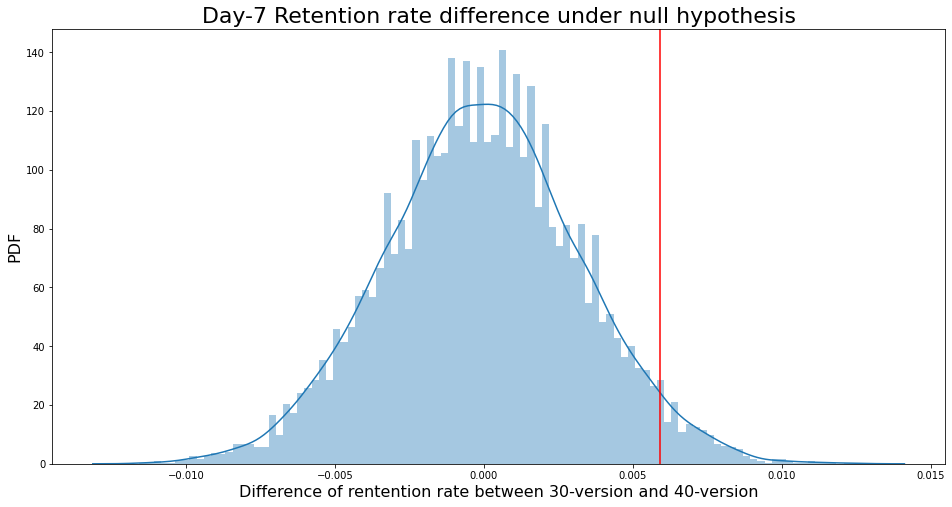

In [ ]:
# Visualize the simulation result
plt.figure(figsize=(16, 8))
sns.distplot(perm_replicates, norm_hist=True, bins=100)

# Label the chart
plt.xlabel('Difference of rentention rate between 30-version and 40-version', size=16)
plt.ylabel('PDF', size=16)
plt.title('Day-7 Retention rate difference under null hypothesis', size=22)
plt.axvline(x=empirical_diff_means, color='r')
plt.annotate(text='p-value', 
             xy=(0.008, 5), 
             xytext=(0.010, 15), 
             color='r', 
             size=20,
             arrowprops={'arrowstyle':'fancy', 'color':'r'})



The p-value is around 0.0365, and this tells us:

The probabitlity of obtaining of a value of the test statistic that is at least as extreme as what we observed in the empirical data, under the assumption that the null hypothesis is true, is around 0.0368.

Note: The p-value has nothing to do with the probabiltiy that the null hypothesis is true.

The p-value is relatively small, so we might reasonably believe that a difference between the retention rates of the 2 versions is real. Since the empirical difference is positive, we can reasonably decide that the gate_30 version has a better day-1 retention rate than gate_40 version does.

Let's now walk through the same flow again, but we use the day-7 retention instead.


In [ ]:
gate30 = data[data['version']=='gate_30']['retention_7']
gate40 = data[data['version']=='gate_40']['retention_7']

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(gate30, gate40)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(gate30, gate40,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0012


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



TypeError: ignored

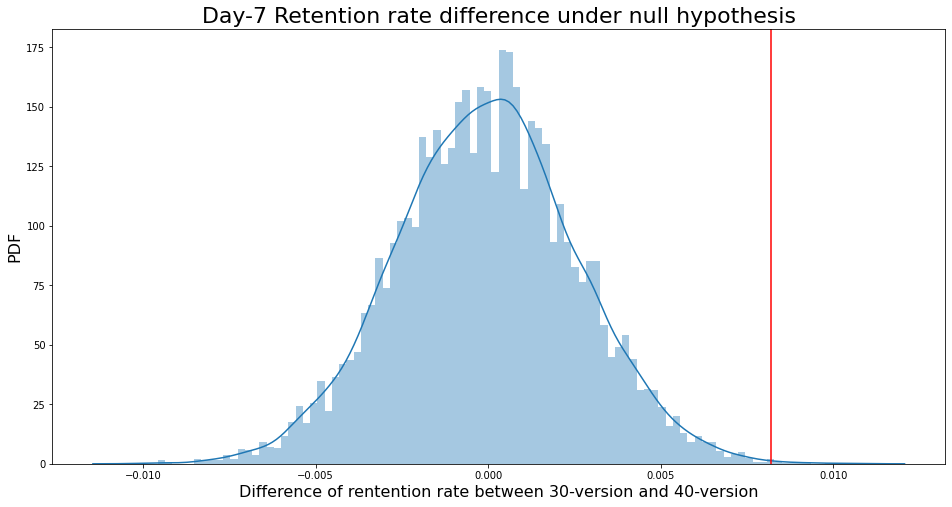

In [ ]:
# Visualize the simulation result
plt.figure(figsize=(16, 8))
sns.distplot(perm_replicates, norm_hist=True, bins=100)

# Label the chart
plt.xlabel('Difference of rentention rate between 30-version and 40-version', size=16)
plt.ylabel('PDF', size=16)
plt.title('Day-7 Retention rate difference under null hypothesis', size=22)
plt.axvline(x=empirical_diff_means, color='r')
plt.annotate(text='p-value', 
             xy=(0.009, 1), 
             xytext=(0.009, 15), 
             color='r', 
             size=20,
             arrowprops={'arrowstyle':'fancy', 'color':'r'})



Seeing the p-value is lower than 0.0009, which is extremely small. We can be very confident to say the difference between the retention rates is real and that gate_30 version has indeed better day-7 retention rate than gate_40 version does.

https://www.kaggle.com/code/ranjeetjain3/visualization-machine-learning-deep-learning


##Corelation

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
from scipy import stats

In [ ]:
new_data=pd.read_csv('https://raw.githubusercontent.com/stevani10/GenerasiGigih2.0/main/cats_clean_rev6.csv')

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

In [ ]:
new_data.drop("no", axis=1, inplace=True)

In [ ]:
new_data.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
new_data.head()

,userid,version,sum_gameround,retention_1,retention_7
0,337,gate_30,38,1,0
1,2179,gate_30,39,1,0
2,2218,gate_30,305,1,1
3,2382,gate_30,73,1,0
4,2392,gate_30,14,1,0


In [ ]:
corelation = data.corr()
data1 = [go.Heatmap(z = np.array(corelation.values),
                   x = np.array(corelation.columns),
                   y = np.array(corelation.columns),
                     colorscale='Blues',) #Blackbody
       ]
py.iplot(data1)

##Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/stevani10/GenerasiGigih2.0/main/cats_clean_rev6.csv')

In [ ]:
dataset.drop("no", axis=1, inplace=True)

In [ ]:
dataset.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
dataset.head()

,userid,version,sum_gameround,retention_1,retention_7
0,337,gate_30,38,1,0
1,2179,gate_30,39,1,0
2,2218,gate_30,305,1,1
3,2382,gate_30,73,1,0
4,2392,gate_30,14,1,0


In [ ]:
dataset.shape

(39986, 5)

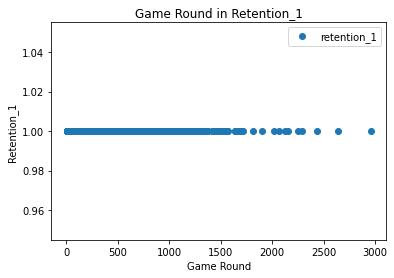

In [ ]:
dataset.plot(x='sum_gameround', y='retention_1', style='o')
plt.title('Game Round in Retention_1')
plt.xlabel('Game Round')
plt.ylabel('Retention_1')
plt.show()

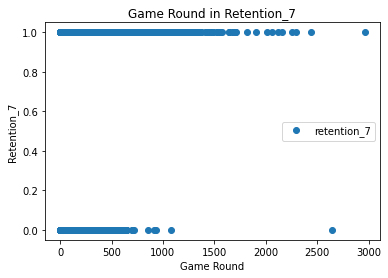

In [ ]:
dataset.plot(x='sum_gameround', y='retention_7', style='o')
plt.title('Game Round in Retention_7')
plt.xlabel('Game Round')
plt.ylabel('Retention_7')
plt.show()

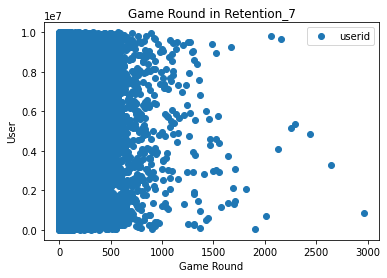

In [ ]:
dataset.plot(x='sum_gameround', y='userid', style='o')
plt.title('Game Round in Retention_7')
plt.xlabel('Game Round')
plt.ylabel('User')
plt.show()

In [ ]:
X = dataset[['sum_gameround','userid' ]]
y = dataset['retention_1']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
sum_gameround,0.0
userid,0.0


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
5953,1,1.0
18315,1,1.0
20059,1,1.0
35184,1,1.0
24373,1,1.0
...,...,...
8602,1,1.0
12721,1,1.0
25731,1,1.0
19720,1,1.0


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.356292306168269
Mean Squared Error: 0.1689950376745938
Root Mean Squared Error: 0.4110900602965168


In [ ]:
X = dataset[['sum_gameround','userid' ]]
y = dataset['retention_7']

In [ ]:
coeff_df1 = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df1

This means that for a retention_7 in "sum_gameround" increase of 1.610838e-03 and there is a decrease of 8.140898 user in userid.  We can see that "userid" have a very little effect on the retention_7.

In [ ]:
y_pred1 = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

You can see that the value of root mean squared error is 0.411,  This means that our algorithm was accurate and can make reasonably good predictions.

